In [13]:
from exponential import *
from scipy.optimize import minimize

In [28]:
def f(x):
    theseparams=x.reshape(3,-1,order='F')

    for i in range(theseparams.shape[1]):
        a,b,c=theseparams[:,i].flatten()
        if a<0 or b<0 or c<0 or (a==0 and b==0) or (a==0 and c==0) or (b==0 and c==0):
            return 1000
        
    subspace=Subspace(theseparams.shape[1])

    subspace.set_N_func(N_func)
    subspace.set_H_func(H_func)

    subspace.set_params(theseparams)

    subspace.make_N_mat()
    subspace.make_H_mat()
    subspace.find_N_eigens()
    subspace.make_Y_mat()
    subspace.make_invs_sqrt_beta_mats()
    subspace.make_P_mats()
    subspace.find_P_eigens()
    subspace.find_energy_levels()
    return subspace.energy_levels[0]
    

In [29]:
x=np.array([
    1,1,1,
    206,1,1,
    1,1,0,
    1,0,1,
    0,1,1
])

In [30]:
cons = [
    {'type':'eq', 'fun': lambda x: x[3]-206*x[4]},
    {'type':'eq', 'fun': lambda x: x[8]},
    {'type':'eq', 'fun': lambda x: x[10]},
    {'type':'eq', 'fun': lambda x: x[12]}
    ]

In [31]:
minimize(f,x0=x,method='SLSQP',constraints=cons)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -402.1747219359467465621201350876756755707864785267400204252858817859369361790835320318185929478975539
       x: [ 1.168e+00  1.020e+00 ...  1.069e+00  1.068e+00]
     nit: 70
     jac: [-1.781e-07 -5.030e-08 ... -4.650e-08 -4.612e-08]
    nfev: 1364
    njev: 70

In [1]:
import matplotlib.pyplot as plt
plt.scatter(N,E)

NameError: name 'N' is not defined

In [ ]:
print(E[3])

-398.76428146133927412075613881047826368329396404881


In [ ]:
def term(ai,bi,ci,aj,bj,cj):
    Ai=2*np.real(ai)+2*np.real(bi)
    Bi=2*np.real(ai)+2*np.real(ci)
    Ci=2*np.real(bi)+2*np.real(ci)
    Aj=2*np.real(aj)+2*np.real(bj)
    Bj=2*np.real(aj)+2*np.real(cj)
    Cj=2*np.real(bj)+2*np.real(cj)

    return (
        np.sqrt(Ai*Aj)/(np.conjugate(ai+bi)+aj+bj)
        *np.sqrt(Bi*Bj)/(np.conjugate(ai+bi)+aj+bj)
        *np.sqrt(Ci*Cj)/(np.conjugate(ai+bi)+aj+bj)
        *Ai*Bi*Ci/np.sqrt( Ai**2 * (Bi + Ci) + Bi**2 * (Ai + Ci) + Ci**2 * (Ai + Bi) + Ai*Bi*Ci)
        *Aj*Bj*Cj/np.sqrt( Aj**2 * (Bj + Cj) + Bj**2 * (Aj + Cj) + Cj**2 * (Aj + Bj) + Aj*Bj*Cj)
    )

In [ ]:
def delta(Amplitudes,params):
    ais, ajs=np.meshgrid(params[0],params[0])
    bis, bjs=np.meshgrid(params[1],params[1])
    cis, cjs=np.meshgrid(params[2],params[2])
    Ampis,Ampjs=np.meshgrid(Amplitudes,Amplitudes)
    terms=term(ais,bis,cis,ajs,bjs,cjs)
    sum=np.sum(np.conjugate(Ampis)*Ampjs*terms)
    return sum/(4*np.pi)

In [ ]:
np.array(params).transpose().shape

(3, 20)

In [ ]:
D=[]
for i in range(len(N)):
    print(i)
    D.append(delta(A[i],np.array(params).transpose()[:,:i+1]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


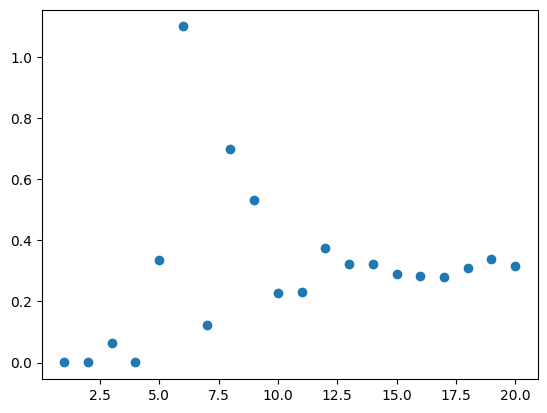

In [ ]:
plt.scatter(N,D)

In [ ]:
print(D[-1])

0.31512424223055325461353223795319125854202801053172
